# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday February 2nd**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

An owner of an animal sanctuary wants to estimate her sanctuary's average food consumption over the next year in order to estimate the future food costs. Her sanctuary comprises 75 pandas, 25 otters, 50 buffalo, and 50 owls. The owner pops open her SanctuaryTrackr App's Current Resident List, randomly selects 24 animals from it, and tracks their food consumptions in pounds per day (lbs/day) over the next week. So as to get a good estimate, she intentionally selects 9 pandas, 3 otters, 6 buffalo, and 6 owls. 

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

In [ ]:
1.A population is a collection of units.
2.A sample frame is the source material or device from which a sample is drawn.
3.A sample is a subset of population.
4. a.simple(uniform) random sample. b. Systematic sample. c. Census sample. d. stratified sample
5. It is something we want to measure for each unit.

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
3.2 \quad
4.2 \quad
3.0 \quad
6.6
$$

**Part A**: Compute the sample mean and sample median.


In [10]:
mean1 = (4.6+5.0+6.5+7.7+3.2+4.2+3.0+6.6)/8
print('The mean value is %d' % mean1)

The mean value is 5


**Part B**: We replace the element $5.0$ by some real number $q$. What happens with the sample mean and the sample median of this new dataset as $q \rightarrow -\infty$?

The sample mean will be $  -\infty$, and the median would stay the same. 

**Part C**: We replace a number of elements by some real number $q$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $q \rightarrow -\infty$?

In [ ]:
5 elements 

**Part D**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $q$, so that the sample mean of the new dataset diverges as $q \rightarrow -\infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

1 element and (n/2)+1 elements for n is even, and (n+1)/2 for n is even

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

we know that 
$$ \bar{x}_{n-1} = \frac{1}{n-1}\sum_{k=1}^{n-1} x_k \quad $$ and $$ \bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k  $$
and we can write $\bar{x}_n = \frac {{\bar{x}_{n-1} \times {(n-1)}}+{x}_n}{n} $. 
So we can rewrite this as $ \frac{{\bar{x}_{n-1}}\times {n} + \bar{x}_n -\bar{x}_{n-1}}{n}$ , which is 
$\bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}$.



**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [52]:
def my_sample_mean(array):
    tt = 0
    count = 0
    for i in array:
        tt = tt+i
        count += 1
    return tt/count

def my_sample_var(array):
    average = my_sample_mean(array)
    count1 = 0 
    tt1 = 0
    for i in array:
        tt1 = (i-int(average)^2 + tt1)
        count1 +=1
    return np.sqrt(tt1/(count1-1))



**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array.

`otter_weights = [25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27]`

In [54]:
arr = [25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27]
print('The sample mean is :%d '%my_sample_mean(arr))
print('The sample var is :%d' %my_sample_var(arr))

The sample mean is :21 
The sample var is :2


**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first one otter, the first two otters, the first three otters, and so on up to all the otters. Store your otter means in a numpy array called `otterations`.

In [150]:
# [25.  27.  31.  28.  24.  21.  18.  17.  17.  18.  18.  20.  21.]

np.otterations =[]
def update_mean(xn,xn1bar,n):
    
    #np.otterations = np.append(np.otterations,int(xn1bar))
    xnbar = xn1bar+(xn-xn1bar)/n
    np.otterations = np.append(np.otterations,float(xnbar))
    return np.otterations

np.array = ([25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27])
np.otterations = np.append(np.otterations,[np.array[:1]])
update_mean(np.array[1],np.otterations[0],2)
for index in range(2,len(np.array)):
    update_mean(np.array[index],np.otterations[index-1],index+1)
print (np.otterations)

[ 25.          27.          31.33333333  28.25        24.          21.
  18.42857143  17.625       17.77777778  18.1         18.45454545
  20.66666667  21.15384615]


### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

In [72]:
local_path = 'titanic_data.csv'
file_path = local_path
df = pd.read_csv(file_path)
df
# 1. if class warfare occurred, passengers who took higher class would survied more
# 2. if male chivalry occurred, female would survive more

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,14.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,39.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,NaN,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,NaN,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,NaN,1,0,237736,30.0708,NaN,C


**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [84]:
#dfTitanic = df[df["Age"] != np.NaN ]
dfTitanic = df.dropna(subset = ["Age"])
dfTitanic = dfTitanic.dropna(subset = ["Sex"])
dfTitanic = dfTitanic.dropna(subset = ["Survived"])
dfTitanic = dfTitanic.dropna(subset = ["Pclass"])
dfTitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,14.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,39.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,42.0,1,1,PP 9549,16.7000,G6,S
11,12,0,1,"Bonnell, Miss. Elizabeth",female,30.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,43.0,1,5,347082,31.2750,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [188]:
print("There are %d people survived." %df["Survived"].sum())
dfs = df[df.Survived == 1]
dfs1 = dfs[dfs.Pclass == 1]
print("There are %d people who in 1st class survived." %dfs1["Survived"].sum())
dfs2 = dfs[dfs.Pclass == 2]
print("There are %d people who in 2nd class survived." %dfs2["Survived"].sum())
dfs3 = dfs[dfs.Pclass == 3]
print("There are %d people who in 3rd class survived." %dfs3["Survived"].sum())
df1 = df[df.Pclass == 1]
df2 = df[df.Pclass == 2]
df3 = df[df.Pclass == 3]
print("The fraction of survivors from 1st class is %f."% (len(dfs1)/len(df1)))
print("The fraction of survivors from 1st class is %f."% (len(dfs2)/len(df2)))
print("The fraction of survivors from 1st class is %f."% (len(dfs3)/len(df3)))


There are 350 people survived.
There are 137 people who in 1st class survived.
There are 90 people who in 2nd class survived.
There are 123 people who in 3rd class survived.
The fraction of survivors from 1st class is 0.634259.
The fraction of survivors from 1st class is 0.489130.
The fraction of survivors from 1st class is 0.250509.


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [149]:
print ("In the 1st class there are %d male survived." %df1.loc[df["Sex"] == "male", ["Survived"]].sum())
print ("In the 1st class there are %d female survived." %df1.loc[df["Sex"] == "female", ["Survived"]].sum())
print ("In the first class, the fraction of male survivors is %f, the fraction of female survivors is %f" %((df1.loc[df["Sex"] == "male", ["Survived"]].sum()/len(df1),(df1.loc[df["Sex"] == "female", ["Survived"]].sum()/len(df1)))))
print("\t")
print ("In the 2nd class there are %d male survived." %df2.loc[df["Sex"] == "male", ["Survived"]].sum())
print ("In the 2nd class there are %d female survived." %df2.loc[df["Sex"] == "female", ["Survived"]].sum())
print ("In the second class, the fraction of male survivors is %f, the fraction of female survivors is %f" %((df2.loc[df["Sex"] == "male", ["Survived"]].sum()/len(df2),(df2.loc[df["Sex"] == "female", ["Survived"]].sum()/len(df2)))))
print("\t")
print ("In the 3rd class there are %d male survived." %df3.loc[df["Sex"] == "male", ["Survived"]].sum())
print ("In the 3rd class there are %d female survived." %df3.loc[df["Sex"] == "female", ["Survived"]].sum())
print ("In the third class, the fraction of male survivors is %f, the fraction of female survivors is %f" %((df3.loc[df["Sex"] == "male", ["Survived"]].sum()/len(df3),(df3.loc[df["Sex"] == "female", ["Survived"]].sum()/len(df3)))))
print("\t")
print("In conclusion, the men in first class had a higher survival rate")

In the 1st class there are 46 male survived.
In the 1st class there are 91 female survived.
In the first class, the fraction of male survivors is 0.212963, the fraction of female survivors is 0.421296
	
In the 2nd class there are 19 male survived.
In the 2nd class there are 71 female survived.
In the second class, the fraction of male survivors is 0.103261, the fraction of female survivors is 0.385870
	
In the 3rd class there are 49 male survived.
In the 3rd class there are 74 female survived.
In the third class, the fraction of male survivors is 0.099796, the fraction of female survivors is 0.150713
	
In conclusion, the men in first class had a higher survival rate


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

The distribution of Age is binomial distribution.


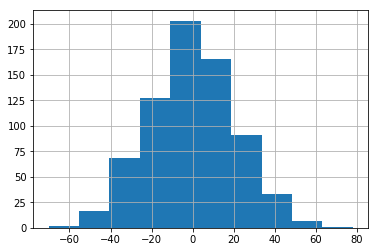

In [278]:
plt.figure();
dfTitanic["Age"].diff().hist(alpha = 1,bins = 10)
print("The distribution of Age is Normal distribution.")

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [186]:
#dfagef = dfTitanic.loc[dfTitanic["Sex"] == "female", ["Survived"]]
df_female = dfTitanic[dfTitanic.Sex == "female"]
df_female_s = df_female[df_female.Survived == 1]
df_female_ns = df_female[df_female.Survived == 0]
print("The median ages for females who survived is %d, the mean age for females who survived is %f" 
      %(df_female_s["Age"].median(),df_female_s["Age"].mean()))
print("\t")
print("The median ages for females who didn't survived is %d, the mean age for females who didn't survived is %f" 
      %(df_female_ns["Age"].median(),df_female_ns["Age"].mean()))
print("\t")
print("So the median and mean ages for females who survived are lower than for females who didn't survive.")


The median ages for females who survived is 26, the mean age for females who survived is 28.405585
	
The median ages for females who didn't survived is 29, the mean age for females who didn't survived is 28.922063
	
So the median and mean ages for females who survived are lower than for females who didn't survive.


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

I think the data suggest both class warfare and male chivalry. 

1. For the class warfare, according to the output of part C, the higher class has higher fraction of survivors.
2. And male chivalry also occured. According to Part D, no matter in which class, the fraction of female survivors is higher than fraction of mele survivors.

### Problem 5 - Not anotter homework problem! :(
***

Otters are undisputedly one of nature's most awesome animals. From a cursory Google Image Search of *baby otter* or *otters holding hands* or *otters water slide* this is easy to demonstrate.

Because the CS Department was able to pull a few strings, we have obtained a dataset of sea otter behavior. For each otter studied, the dataset contains:

- **hhrecord**: the otter's personal record for hand-holding (hours; 999) 
- **pawsize**: the size of the otter's paw (unspecified units; 999)
- **floatation**: boolean, indicating whether the otter displayed leadership in floatation. (9)
- **satscore**: the otter's projected SAT score percentile. (unclear why this was included; 99)
- **height**: otter's height (unspecified units; 99)
- **weight**: otter's weight (unspecified units; 999)
- **urchins**: boolean, indicating whether the otter was observed eating urchins (9)

All these data are included in the whitespace-delimited file `otters.data`


**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values. Those values are listed parenthetically in the description above Store the modified data set in a Pandas DataFrame called dfOtters. 

In [231]:
otter = pd.read_csv('otters.data',delim_whitespace=True)
otter = otter[otter.hhrecord != 9]
otter = otter[otter.hhrecord != 99]
otter = otter[otter.hhrecord != 999]

otter = otter[otter.pawsize != 9]
otter = otter[otter.pawsize != 99]
otter = otter[otter.pawsize != 999]

otter = otter[otter.floatation != 9]
otter = otter[otter.floatation != 99]
otter = otter[otter.floatation != 999]

otter = otter[otter.satscore != 9]
otter = otter[otter.satscore != 99]
otter = otter[otter.satscore != 999]

otter = otter[otter.height !=9]
otter = otter[otter.height !=99]
otter = otter[otter.height !=999]

otter = otter[otter.weight !=9]
otter = otter[otter.weight !=99]
otter = otter[otter.weight !=999]

otter = otter[otter.urchins !=9]
otter = otter[otter.urchins !=99]
dfOtters = otter[otter.urchins !=999]

dfOtter



,hhrecord,pawsize,floatation,satscore,height,weight,urchins
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1
10,140,351,0,27,68,120,0


**Part B**: Use the information in dfOtters to create a density histogram of the hand-holding records of otters who do not eat sea urchins (urchins=0) and another histogram placed directly below the first in the same graphics device for the hand-holding records of otters who do eat urchins (urchins=1).  Make the range of the horizontal axis $30$ to $180$ (hours) for both histograms.  Make sure to give each subplot titles and label axes. 

(30, 180)

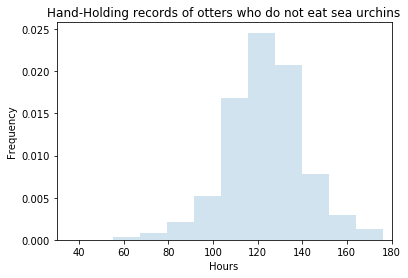

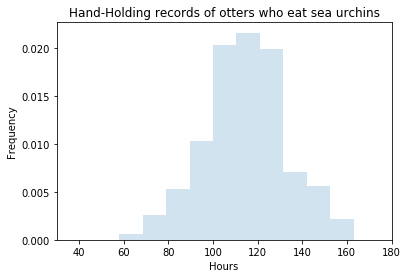

In [277]:

urchins1 = dfOtters[dfOtters.urchins == 0]
urchins2 = dfOtters[dfOtters.urchins == 1]
plt.figure()
ax1 = urchins1["hhrecord"].plot.hist(alpha = 0.2,density=True,title = 'Hand-Holding records of otters who do not eat sea urchins')
ax1.set_xlabel("Hours")
ax1.set_xlim(30,180)
plt.figure()
ax2 = urchins2["hhrecord"].plot.hist(alpha = 0.2, density=True, title = 'Hand-Holding records of otters who eat sea urchins')
ax2.set_xlabel("Hours")
ax2.set_xlim(30,180)


**Part C**: Based on the histograms in **Part B**, characterize the distribution of hand-holding records for both urchin and non-urchin eaters.

Both of them are Normal Distribution.

**Part D**: What are the mean and median hand-holding record differences between otters who eat urchins and otters who don't?  Can you think of any reason not to use the mean as a measure of center to compare records for this problem? 

In [284]:
print("The mean hand-holding record for otters who eat urchins is %f and median is %d"%(urchins2["hhrecord"].mean(),urchins2["hhrecord"].median()))
print("The mean hand-holding record for otters who do not eat urchins is %f and median is %d"%(urchins1["hhrecord"].mean(),urchins1["hhrecord"].median()))
print("\t")
print ("The difference between mean is %f,the differences between median is %d"%((123.417847-114.246637),(124-115)))
print("\t")
print("Not using mean value as a measure of center is because some extreme values would affect the mean value.")

The mean hand-holding record for otters who eat urchins is 114.246637 and median is 115
The mean hand-holding record for otters who do not eat urchins is 123.417847 and median is 124
	
The difference between mean is 9.171210,the differences between median is 9
	
Not using mean value as a measure of center is because some extreme values would affect the mean value.


**Part E**: Create side-by-side box-and-whisker plots to compare the hand-holding records of otters who eat urchins and otters who do not.  Use the box-and-whisker plot conventions discussed in lecture. 

Text(0.5,0,'(Hours)')

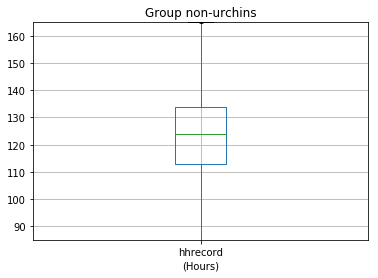

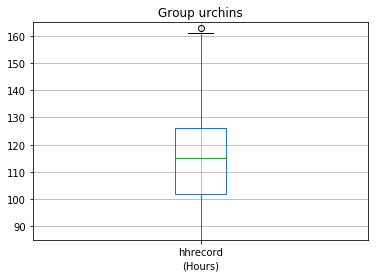

In [311]:

box = urchins1.boxplot(column = ['hhrecord'])
box.set_ylim(85,165)
box.set_xlabel('(Hours)')
box.set_title( 'Group non-urchins')
plt.figure()
box1 = urchins2.boxplot(column = ['hhrecord'])
box1.set_ylim(85,165)
box1.set_title( 'Group urchins')
box1.set_xlabel('(Hours)')

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of hand-holding records of otters within each urchin / non-urchin groups as well as the comparison of the two classes. 

The otters who eat sea urchins have a higher hand-holding records. 

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **D**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **D**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [390]:
def clean_election_data():
 
    ed = pd.read_csv("2014_election_results.csv")
    
    dfClean = ed.dropna(subset = ["STATE"])
    dfClean = ed.dropna(subset = ["D"])
    dfClean = ed.dropna(subset = ["GENERAL PERCENT"])
    dfClean['CANDIDATE NAME'].apply(lambda x : dfClean['CANDIDATE NAME (Last)'] if  dfClean["CANDIDATE NAME"].any() == 'Scattered' else x )

    return dfClean

    


,STATE ABBREVIATION,STATE,D,FEC ID#,(I),CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,PARTY,...,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL PERCENT,GE RUNOFF ELECTION VOTES (LA),GE RUNOFF ELECTION % (LA),"COMBINED GE PARTY TOTALS (CT, NY, SC)","COMBINED % (CT, NY, SC)",GE WINNER INDICATOR,FOOTNOTES
0,AL,Alabama,1,H4AL01123,(I),Bradley,Byrne,"Byrne, Bradley",NaN,R,...,NaN,NaN,"103,758","68,16%",NaN,NaN,NaN,NaN,W,NaN
1,AL,Alabama,1,H4AL01156,NaN,Burton R.,LeFlore,"LeFlore, Burton R.",NaN,D,...,NaN,NaN,"48,278","31,71%",NaN,NaN,NaN,NaN,NaN,NaN
2,AL,Alabama,1,n/a,NaN,NaN,NaN,Scattered,NaN,W,...,NaN,NaN,198,"0,13%",NaN,NaN,NaN,NaN,NaN,NaN
5,AL,Alabama,2,H0AL02087,(I),Martha,Roby,"Roby, Martha",NaN,R,...,NaN,NaN,"113,103","67,34%",NaN,NaN,NaN,NaN,W,NaN
6,AL,Alabama,2,H4AL02071,NaN,Erick,Wright,NaN,NaN,D,...,NaN,NaN,"54,692","32,56%",NaN,NaN,NaN,NaN,NaN,NaN
7,AL,Alabama,2,n/a,NaN,NaN,NaN,Scattered,NaN,W,...,NaN,NaN,157,"0,09%",NaN,NaN,NaN,NaN,NaN,NaN
10,AL,Alabama,3,H2AL03032,(I),Mike,Rogers,"Rogers, Mike",NaN,R,...,NaN,NaN,"103,558","66,12%",NaN,NaN,NaN,NaN,W,NaN
13,AL,Alabama,3,H4AL03061,NaN,Jesse T.,Smith,"Smith, Jesse T.",NaN,D,...,NaN,NaN,"52,816","33,72%",NaN,NaN,NaN,NaN,NaN,NaN
14,AL,Alabama,3,n/a,NaN,NaN,NaN,Scattered,NaN,W,...,NaN,NaN,246,"0,16%",NaN,NaN,NaN,NaN,NaN,NaN
17,AL,Alabama,4,H6AL04098,(I),Robert,Aderholt,"Aderholt, Robert",NaN,R,...,NaN,NaN,"132,831","98,57%",NaN,NaN,NaN,NaN,W,NaN


**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

In [ ]:
def winners_and_margins(df):
    
    return dfWinners